## The Efficient Frontier: Markowitz portfolio optimization in Python 

https://blog.quantopian.com/markowitz-portfolio-optimization-2/

In [275]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd



import json
from bs4 import BeautifulSoup
import requests
from datetime import datetime, date, time, timedelta
import sched
import time as mod_time
from pandas.io.json import json_normalize
from sklearn import preprocessing
import scipy.optimize as sco
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline



np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [19]:
url = "https://api.coinmarketcap.com/v1/ticker/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
dic = json.loads(soup.prettify())

# create an empty DataFrame
df = pd.DataFrame(columns=["Ticker", "MarketCap"])
 
for i in range(len(dic)):
    df.loc[len(df)] = [dic[i]['symbol'], dic[i]['market_cap_usd']]
 
df.sort_values(by=['MarketCap'])
P = df.iloc[:400]
P.head()
tickers = P['Ticker'].tolist()
tickers.append('IOTA')

In [82]:
#https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=60&aggregate=3&e=CCCAGG,
fysm = 'BTC'
tsym = 'USD'
d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm ,tsym)).text)
json_normalize(d)
df_BTC = pd.DataFrame(d['Data'])
#df_BTC['time'] =  pd.to_datetime(df_BTC['time'],unit='s')
df_BTC.set_index('time', drop=False, inplace=True)
df_BTC['BTC'] = df_BTC['close']
df_BTC = df_BTC[['BTC', 'time']] 

#df['time'] =  pd.to_datetime(df['time'],unit='s')
adding = 68
count = 0

for fysm in tickers: 
    if fysm == 'BTC':
        adding += 1
        print adding
    else:
        try:
            d = json.loads(requests.get('https://min-api.cryptocompare.com/data/histohour?fsym=%s&tsym=%s&limit=6000&aggregate=1' % (fysm, 'USD')).text)
            json_normalize(d)
            df = pd.DataFrame(d['Data'])
            df.set_index('time', drop=True, inplace=True)
            df_BTC[fysm] = df['close']
        except:
            print fysm
            continue
    

df_BTC.head()
df_BTC['time'] =  pd.to_datetime(df_BTC['time'],unit='s')
df_BTC.set_index('time', drop=True, inplace=True)

69
MIOTA
GXS


ImportError: cannot import name clipboard_set

In [290]:
df.cumsum().pct_change(1)


,BTC,ETH,BCH,XRP,DASH,LTC,XMR,ETC,NEO,XEM,...,SNGLS,POT,GRS,LRC,ADX,PPC,ZEN,UBQ,NAV,BAY
time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,0.368575,0.243798,0.425931,0.204288,0.568907,0.389375,0.480675,0.370544,0.351640,0.545336,...,27.595041,0.332618,-1.581273,0.366018,0.374638,1.036585,0.607890,0.305533,0.384027,0.577909
2017-09-13 07:00:00,0.707579,0.668715,0.509318,0.531210,0.549036,0.687266,0.653175,0.508568,0.525334,0.330470,...,-0.097853,0.577368,2.112328,0.709517,0.441871,0.658683,0.589556,0.651780,0.601812,0.522272
2017-09-13 08:00:00,0.430585,0.450597,0.324896,0.304860,0.418138,0.378294,0.439879,0.376123,0.399817,0.212666,...,-0.475229,0.270996,1.668810,0.430553,0.479627,0.230672,0.423282,0.371381,0.336998,0.311682
2017-09-13 09:00:00,0.368440,0.387309,0.311880,0.298410,0.294708,0.326242,0.342933,0.322290,0.344051,0.431052,...,-1.898731,0.434495,0.310836,0.368868,0.336472,0.203055,0.331355,0.102133,0.312231,0.287319
2017-09-13 10:00:00,0.333971,0.367163,0.325485,0.307611,0.297262,0.307172,0.117268,0.300940,0.194606,0.323450,...,3.133864,0.402861,0.277734,0.334091,0.261615,0.238926,0.284404,0.226495,0.384226,0.260962
2017-09-13 11:00:00,0.251056,0.306744,0.265807,0.273910,0.283406,0.231977,0.152637,0.258738,0.274152,0.315033,...,0.920084,0.141605,-0.556386,0.251050,0.243801,0.192849,0.230726,0.297129,0.386959,0.176904
2017-09-13 12:00:00,0.158798,0.181415,0.162623,0.146902,0.169663,0.146103,0.085312,0.154634,0.134440,0.242285,...,0.337751,-0.065337,-0.211134,0.158707,0.137637,0.130089,0.141123,0.147305,0.196472,0.092887
2017-09-13 13:00:00,0.141728,0.140814,0.148643,0.150340,0.161593,0.129279,0.064854,0.140527,0.134779,0.093231,...,0.236345,0.024219,0.286294,0.142002,0.118308,0.134684,0.127563,0.136951,0.180558,0.095781


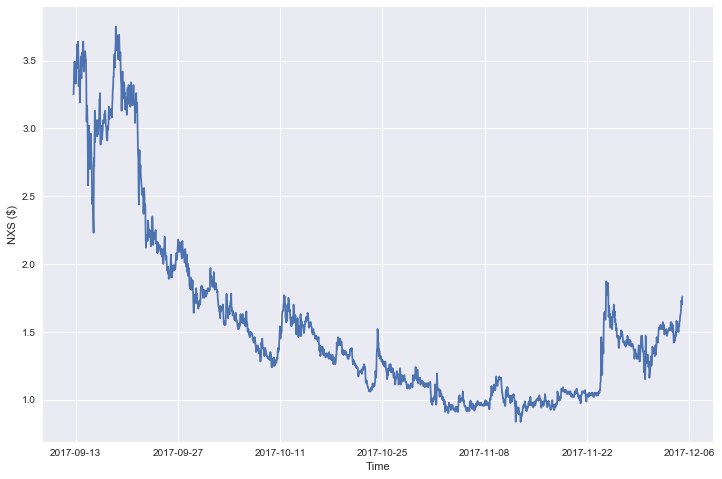

In [288]:
df = df_BTC.loc[:, (df_BTC != 0).any(axis=0)]
df = df.pct_change(12)[12:]


df = df.loc[:,(df.applymap(lambda x: x < 10).all(axis=0) == True)]

#print returns.SUB
plt.figure(figsize=(12,8))
plt.plot(df_BTC['NXS'])
plt.xlabel('Time')
plt.ylabel('NXS ($)')

In [268]:
## NUMBER OF ASSETS


## NUMBER OF OBSERVATIONS
n_obs = len(df)

some = df.iloc[:, :4]
new = some.reset_index(drop=True)
new
return_vec = np.array(df)
n_assets = len(df)

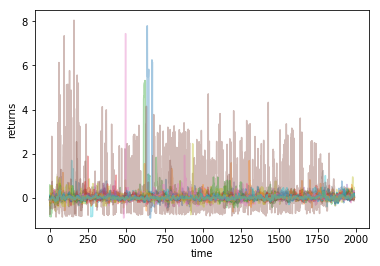

In [269]:
plt.plot(return_vec, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [258]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print rand_weights(n_assets)
print rand_weights(n_assets)

[  5.20930148e-05   3.53189774e-04   1.66294465e-04 ...,   7.83282241e-04
   1.60908180e-04   3.30223233e-04]
[  1.78857769e-04   7.14303769e-04   9.01828569e-04 ...,   6.12658779e-05
   8.09704997e-04   8.05630462e-05]


In [259]:
avg_ret = np.asmatrix(np.mean(return_vec, axis=1))
len(avg_ret)

1

In [260]:
weight = np.asmatrix(rand_weights(return_vec.shape[0]))
len(weight.T)

1989

In [261]:
cov = np.asmatrix(np.cov(return_vec))
len(cov)

1989

In [262]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    #returns of the portfolio
    p = np.asmatrix(np.mean(returns, axis=1))
    
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    
    return mu, sigma

In [265]:
n_portfolios = 2500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in xrange(n_portfolios)
])

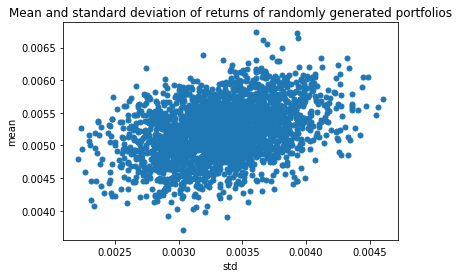

In [266]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [267]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(new)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

/Users/chandler/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


ValueError: Rank(A) < p or Rank([P; A; G]) < n

In [ ]:
print weights

## Backtesting on real market data